In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve
from sklearn.model_selection import train_test_split
import pandas as pd

# Load data from CSV file and split into features and labels
df = pd.read_csv('20thMarch_CVD.csv')
X = df.drop(['Label', 'subject_id', 'icustay_id'], axis=1)
y = df['Label']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN classifier and fit to training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict labels on validation set
y_pred = knn.predict(X_val)

# Compute evaluation metrics on validation set
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)
precision_recall_auc = precision_recall_curve(y_val, y_pred)

# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('ROC AUC:', roc_auc)
print('Precision-Recall AUC:', precision_recall_auc)


Accuracy: 0.9880698764380059
Precision: 0.9988469299509946
Recall: 0.9852146715951094
F1-score: 0.9919839679358716
ROC AUC: 0.9909081004534596
Precision-Recall AUC: (array([0.74925437, 0.99884693, 1.        ]), array([1.        , 0.98521467, 0.        ]), array([0, 1], dtype=int64))


<Axes: >

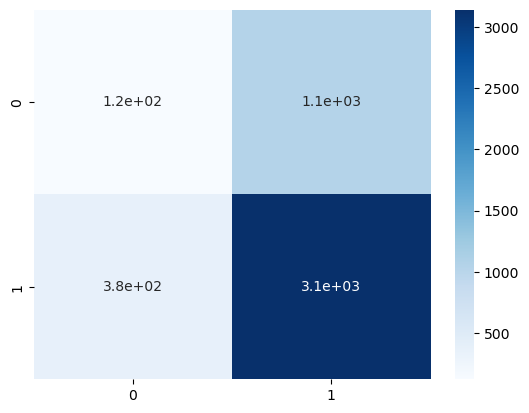

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load data and split into features and labels
X = df.drop('Label', axis=1)
y = df['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN classifier and fit to data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict labels on test set
y_pred = knn.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues')


In [5]:
from sklearn.model_selection import cross_val_score

# Load data and split into features and labels
X = df.drop('Label', axis=1)
y = df['Label']

# Create KNN classifier and fit to data
knn = KNeighborsClassifier(n_neighbors=5)

# Compute cross-validation scores
scores = cross_val_score(knn, X, y, cv=5)

# Print average score
print("Average cross-validation score: {:.2f}".format(scores.mean()))


Average cross-validation score: 0.69


In [6]:
# Load external test data
test_data = pd.read_csv('20thMarch_CVD_withno_Label.csv')

# Split test data into features and labels
X_test = test_data.drop('Label', axis=1)
y_test = test_data['Label']

# Create KNN classifier and fit to training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict labels on external test set
y_pred = knn.predict(X_test)

# Compute external validation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print external validation metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))


Accuracy: 0.76
Precision: 0.78
Recall: 0.94
F1-score: 0.85


In [7]:
from sklearn.model_selection import GridSearchCV

# Load data and split into features and labels
X = df.drop('Label', axis=1)
y = df['Label']

# Define parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Create KNN classifier
knn = KNeighborsClassifier()

# Perform grid search to find best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)

# Print best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)


Best hyperparameters:  {'n_neighbors': 11}
